In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # plot fancy stuff
import matplotlib.pyplot as plt #plot stuff

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\enzyme-stability-prediction-rand-forest-approch.ipynb
.\Novozymes_Kaggle_Model.ipynb
.\sample_submission.csv
.\test.csv
.\train.csv
.\wildtype_structure_prediction_af2.pdb
.\.ipynb_checkpoints\enzyme-stability-prediction-rand-forest-approch-checkpoint.ipynb
.\.ipynb_checkpoints\Novozymes_Kaggle_Model-checkpoint.ipynb


In [14]:
train = pd.read_csv('train.csv')

In [15]:
test = pd.read_csv('test.csv')

In [16]:
train_update = pd.read_csv('train_updates_20220929.csv')

In [17]:
test

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [7]:
train_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            2434 non-null   int64  
 1   protein_sequence  25 non-null     object 
 2   pH                25 non-null     float64
 3   data_source       0 non-null      float64
 4   tm                25 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 95.2+ KB


In [8]:
train.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [10]:
train.describe()

,seq_id,pH,tm
count,31390.000000,31104.000000,31390.000000
mean,15694.500000,6.892339,49.147337
std,9061.656811,1.612225,14.010089
min,0.000000,1.990000,-1.000000
25%,7847.250000,7.000000,42.100000
50%,15694.500000,7.000000,48.000000
75%,23541.750000,7.000000,53.800000
max,31389.000000,64.900000,130.000000


In [11]:
train.corr()

,seq_id,pH,tm
seq_id,1.000000,-0.040164,0.008750
pH,-0.040164,1.000000,-0.044544
tm,0.008750,-0.044544,1.000000


In [12]:
train.columns

Index(['seq_id', 'protein_sequence', 'pH', 'data_source', 'tm'], dtype='object')

In [13]:
#From above analysis we can find that there is no need of data_source from corelation and statistical description.
#So lets remove it.

In [14]:
train.drop(['data_source'],axis=1,inplace=True)
train

,seq_id,protein_sequence,pH,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5
...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,50.7


In [15]:
train.isnull().sum()#calculate null value present in training dataset.

seq_id                0
protein_sequence      0
pH                  286
tm                    0
dtype: int64

In [16]:
train['pH'] = train['pH'].fillna(train['pH'].mean())

Text(0.5, 1.0, 'Heatmap for correlation between columns of training data')

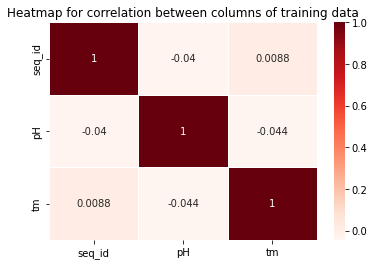

In [17]:
sns.heatmap(train.corr(),linewidths=1,cmap=plt.cm.Reds, annot=True);

plt.title('Heatmap for correlation between columns of training data')

In [18]:
import re   #import regular expression module for individual amino acid extrcation 

In [19]:
search ="A"
# count of occurrence of A and creating new column
#train["A"]=train["protein_sequence"].str.count(search, re.I)

In [20]:
#To make things easier here details of all amino acids are listed in search_amino.
search_amino=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
for amino_acid in search_amino:
     train[amino_acid]=train['protein_sequence'].str.count(amino_acid,re.I)

In [21]:
train.drop(['protein_sequence'],axis=1,inplace=True)
train

,seq_id,pH,tm,A,C,D,E,F,G,H,...,M,N,P,Q,R,S,T,V,W,Y
0,0,7.0,75.7,45,1,13,30,13,38,3,...,8,5,18,6,25,11,14,37,4,3
1,1,7.0,50.5,28,0,10,52,6,18,4,...,2,6,8,22,30,14,12,13,3,3
2,2,7.0,40.5,50,9,27,32,21,65,11,...,6,15,20,25,31,33,30,30,3,16
3,3,7.0,47.2,20,5,19,29,12,16,7,...,2,9,16,9,10,16,19,14,3,4
4,4,7.0,49.5,86,14,78,78,32,84,40,...,31,65,128,54,63,148,120,124,16,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31385,31385,7.0,51.8,33,12,38,31,18,51,15,...,13,24,25,24,42,33,18,42,13,18
31386,31386,7.0,37.2,37,5,21,29,22,27,22,...,14,19,19,16,25,37,26,34,5,14
31387,31387,7.0,64.6,13,1,7,7,7,11,2,...,7,5,6,8,3,10,6,7,4,4
31388,31388,7.0,50.7,47,5,34,36,23,52,11,...,26,25,31,12,25,51,32,48,3,18


In [22]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(train)

In [23]:
test.describe()

,seq_id,pH
count,2413.000000,2413.0
mean,32596.000000,8.0
std,696.717422,0.0
min,31390.000000,8.0
25%,31993.000000,8.0
50%,32596.000000,8.0
75%,33199.000000,8.0
max,33802.000000,8.0


In [24]:
search_amino=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
for amino in search_amino:
    test[amino]=test['protein_sequence'].str.count(amino,re.I)

In [25]:
test.drop(['data_source','protein_sequence'],axis=1,inplace=True)
test.head()

,seq_id,pH,A,C,D,E,F,G,H,I,...,M,N,P,Q,R,S,T,V,W,Y
0,31390,8,22,4,15,8,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
1,31391,8,22,4,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
2,31392,8,22,4,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
3,31393,8,22,5,15,7,10,19,0,6,...,0,19,17,13,3,18,8,13,6,6
4,31394,8,22,4,15,7,11,19,0,6,...,0,19,17,13,3,18,8,13,6,6


In [26]:
#Data Visualization of training data

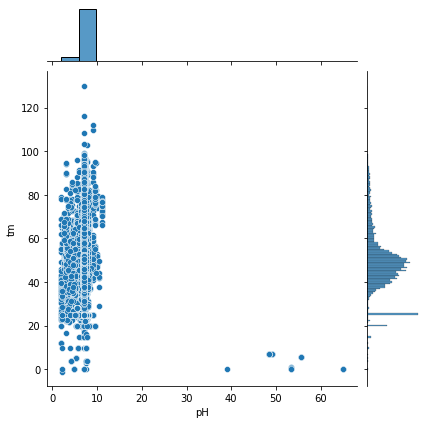

In [27]:
sns.jointplot(data=train, x="pH", y="tm")

In [28]:
train['pH'].value_counts()

7.000000     26462
7.500000       576
8.000000       502
3.000000       288
6.892339       286
             ...  
3.140000         1
2.530000         1
2.810000         1
39.000000        1
10.300000        1
Name: pH, Length: 116, dtype: int64

In [29]:
train['tm'].value_counts()

25.0     1472
20.0      561
50.0      200
45.0      178
49.7      176
         ... 
98.1        1
97.6        1
92.7        1
1.2         1
103.0       1
Name: tm, Length: 770, dtype: int64

In [30]:
x=train.drop(['tm'],axis=1)
y=train['tm']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.20,random_state=42)

In [33]:
x_train.shape,y_train.shape

((25112, 22), (25112,))

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [36]:
rf = RandomForestRegressor()

In [37]:
from pprint import pprint
#lets find the parameters used by Randomforest models
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [38]:
from scipy.stats import randint

random_grid={'max_depth':list(np.arange(10, 100, step=10)),
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [39]:
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1adaf36050>,
 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1adaf36290>,
 'min_samples_split': array([2, 4, 6, 8]),
 'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])}


In [40]:
# Use the random grid to search for best hyperparameters
#create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, scoring='neg_mean_absolute_error', 
                              cv =3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=360; total time=  12.0s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=360; total time=  12.3s
[CV] END max_depth=50, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=210; total time=  11.9s
[CV] END max_depth=50, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=410; total time=   9.7s
[CV] END max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=6, n_estimators=460; total time=  11.6s
[CV] END max_depth=30, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=410; total time=  22.6s
[CV] END max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=4, n_estimators=160; total time=   6.8s
[CV] END max_depth=70, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   6.7s
[C

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1adaf36050>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1adaf36290>,
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [41]:
y_predict= rf_random.predict(x_valid)
y_predict.shape

(6278,)

In [42]:
test.shape

(2413, 22)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tm', ylabel='Density'>

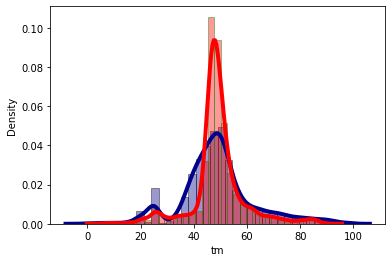

In [43]:
# Density Plot and Histogram of all arrival delays
sns.distplot(y_valid, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
# Density Plot and Histogram of all arrival delays
sns.distplot(y_predict, hist=True, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'green'},
             kde_kws={'linewidth': 4})


In [44]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_predict)))

Mean Absolute Error: 6.243216771014148
Mean Squared Error: 78.06712196700825
Root Mean Squared Error: 8.835560082247659


In [45]:
from scipy.stats import spearmanr

In [46]:
from scipy import stats

stats.spearmanr(y_valid, y_predict)

SpearmanrResult(correlation=0.5861139543637355, pvalue=0.0)

In [47]:
submission =pd.DataFrame()

In [48]:
submission['seq_id']=test['seq_id']

In [49]:
submission['tm'] =rf_random.predict(test)

In [50]:
submission.to_csv('submission.csv',index=False)
submission

,seq_id,tm
0,31390,47.460957
1,31391,47.147371
2,31392,47.414311
3,31393,49.728537
4,31394,49.493891
...,...,...
2408,33798,47.216911
2409,33799,47.005208
2410,33800,47.356829
2411,33801,47.226983


In [51]:
from IPython.display import FileLink
FileLink(r'submission.csv')

/kaggle/working/submission.csv